# Gene Annotation with GO and MyGene

In [38]:
import mygene

import pandas as pd
import numpy as np

from datetime import datetime

In [96]:
from goatools.base import download_go_basic_obo
from goatools.obo_parser import GODag

In [40]:
# Read the union of all genes
union_df = pd.read_csv('../data/union_genes_clustered_df.csv')
union_df

,gene_transcript,ENSG00000188976,ENSG00000187961,ENSG00000187608,ENSG00000160087,ENSG00000127054,ENSG00000162576,ENSG00000175756,ENSG00000242485,ENSG00000160072,...,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727
0,10005_ZBTB4_P1_ENSG00000174282,-0.030201,-0.088615,0.097081,-0.050281,0.053923,0.047092,0.025221,-0.003499,-0.085795,...,0.319526,0.479325,0.232490,0.783892,0.759569,0.293088,0.485888,0.890428,0.252083,0.634143
1,10006_ZBTB5_P1P2_ENSG00000168795,-0.094131,0.093585,0.041780,0.011111,0.049495,0.068986,-0.062200,0.044283,-0.089965,...,0.045284,-0.076742,-0.120616,0.070922,0.016384,-0.156901,-0.037597,0.021802,0.063851,0.220182
2,10015_ZBTB8OS_P1P2_ENSG00000176261,0.042972,-0.122381,0.015089,-0.010220,0.021991,-0.140862,-0.131819,0.023055,-0.064811,...,-0.091865,0.015270,0.023904,-0.119254,-0.024721,-0.149914,-0.079422,0.134310,-0.018046,0.106836
3,10020_ZC3H13_P1P2_ENSG00000123200,-0.120841,-0.013023,0.690666,0.369722,0.229487,0.635588,0.187934,0.145091,-0.204043,...,0.421244,0.118716,1.633748,0.379121,0.741676,0.302818,0.341236,-0.045770,0.586778,0.497639
4,10022_ZC3H15_P1P2_ENSG00000065548,-0.069962,0.045348,-0.056278,0.054014,0.087813,-0.018570,-0.081548,0.034590,-0.071243,...,-0.056516,-0.100137,-0.184080,-0.184826,-0.338238,-0.107827,-0.124266,-0.230523,-0.098643,-0.313071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,9990_ZBTB38_P2_ENSG00000177311,-0.023088,0.074530,-0.028234,-0.102966,0.021527,-0.110965,-0.041697,-0.002252,-0.055727,...,0.077874,-0.041296,0.062638,0.081048,-0.016689,-0.107828,0.039389,-0.131908,0.007189,0.013382
3626,9991_ZBTB38_P1_ENSG00000177311,0.032109,0.040046,0.105273,0.070274,0.090874,0.093788,-0.022295,0.051294,0.058453,...,-0.038383,0.107337,0.132487,0.000794,0.048490,0.058422,0.086549,0.084963,-0.000500,0.017837
3627,9992_ZBTB39_P1P2_ENSG00000166860,-0.054780,-0.051475,0.206940,0.023562,-0.088279,-0.061373,0.207843,0.118381,-0.089880,...,0.477575,0.022448,0.245556,0.563584,0.508211,-0.165814,0.636640,0.252488,-0.188369,0.921252
3628,9998_ZBTB44_P1P2_ENSG00000196323,0.166343,0.202679,-0.026491,-0.038248,0.146278,-0.032702,0.019084,-0.108255,-0.100237,...,-0.152123,0.028410,-0.097497,-0.009866,0.307779,0.115760,0.009843,0.058135,0.210319,-0.117736


In [41]:
union_df.columns

Index(['gene_transcript', 'ENSG00000188976', 'ENSG00000187961',
       'ENSG00000187608', 'ENSG00000160087', 'ENSG00000127054',
       'ENSG00000162576', 'ENSG00000175756', 'ENSG00000242485',
       'ENSG00000160072',
       ...
       'ENSG00000198712', 'ENSG00000228253', 'ENSG00000198899',
       'ENSG00000198938', 'ENSG00000198840', 'ENSG00000212907',
       'ENSG00000198886', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000198727'],
      dtype='object', length=3461)

In [42]:
perturbations = union_df['gene_transcript'].tolist()
len(perturbations), len(set(perturbations))

(3630, 3630)

In [43]:
perturbations  = [i.split("_")[-1] for i in perturbations]
len(perturbations), len(set(perturbations))

(3630, 3483)

In [44]:
gene = union_df.columns[1:].tolist()
len(gene), len(set(gene))

(3460, 3460)

In [45]:
union_df.shape

(3630, 3461)

In [46]:
len(set(gene).union(set(perturbations)))

3604

In [47]:
union = set(gene) | set(perturbations)
len(union)

3604

In [48]:
intersection = set(gene) & set(perturbations)
len(intersection)

3339

In [ ]:
union = list(union)

In [74]:
not_found_genes = []
genes_with_no_mf = []

def fetch_go_data(gene_list):
    mg = mygene.MyGeneInfo()
    
    # 1. Query fields
    # We ask for go.BP (Process) and go.MF (Function)
    results = mg.querymany(gene_list, 
                           scopes='ensembl.gene', 
                           fields='symbol,go.BP,go.MF', 
                           species='human')
    
    bp_data, mf_data = [], []
    
    for item in results:
        gene = item.get('query')
        symbol = item.get('symbol', 'Unknown')
        # Skip if no GO data found
        if 'go' not in item:
            not_found_genes.append(gene)
            continue
            
        # 2. Extract Biological Process (BP) - "The Big Picture"
        # We normalize because sometimes it returns a dict (1 result) or list (many results)
        bp_raw = item['go'].get('BP', [])
        if isinstance(bp_raw, dict): bp_raw = [bp_raw]
        
        for entry in bp_raw:
            bp_data.append({
                'Gene': gene,
                'Gene_Symbol': symbol,
                'Type': 'Biological_Process',
                'GO_ID': entry.get('id'),
                'Term': entry.get('term'),
                'Evidence': entry.get('evidence'),
                'Category': 'BP'
            })
            
        # 3. Extract Molecular Function (MF) - "The Mechanism"
        mf_raw = item['go'].get('MF', [])
        if isinstance(mf_raw, list) and len(mf_raw) == 0:
            genes_with_no_mf.append(gene)
        if isinstance(mf_raw, dict): mf_raw = [mf_raw]
        
        for entry in mf_raw:
            mf_data.append({
                'Gene': gene,
                'Gene_Symbol': symbol,
                'Type': 'Molecular_Function',
                'GO_ID': entry.get('id'),
                'Term': entry.get('term'),
                'Evidence': entry.get('evidence'),
                'Category': 'MF'
            })

    return pd.DataFrame(bp_data), pd.DataFrame(mf_data)

In [75]:
bp_df, mf_df = fetch_go_data(union)
bp_df.head()

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found no hit:	['ENSG00000112096', 'ENSG00000269028', 'ENSG00000255823', 'nan']


,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category
0,ENSG00000103266,STUB1,Biological_Process,GO:0000165,MAPK cascade,IEA,BP
1,ENSG00000103266,STUB1,Biological_Process,GO:0000165,MAPK cascade,ISS,BP
2,ENSG00000103266,STUB1,Biological_Process,GO:0000209,protein polyubiquitination,IBA,BP
3,ENSG00000103266,STUB1,Biological_Process,GO:0000209,protein polyubiquitination,IDA,BP
4,ENSG00000103266,STUB1,Biological_Process,GO:0000209,protein polyubiquitination,IEA,BP


In [77]:
len(not_found_genes), len(genes_with_no_mf)

(104, 63)

Investigating the Genes whose data were not found!

In [78]:
mg = mygene.MyGeneInfo()

# Let's assume this is your list of 104 missing IDs
missing_genes = not_found_genes # The list you created in your script

print(f"Investigating {len(missing_genes)} missing genes...")

# Query explicitly for the 'type' and 'name'
# This tells us WHAT the gene is, even if it has no GO terms
results = mg.querymany(missing_genes, 
                       scopes='ensembl.gene', 
                       fields='symbol,name,type_of_gene', 
                       species='human')

diagnosis = []

for item in results:
    diagnosis.append({
        'Ensembl_ID': item.get('query'),
        'Symbol': item.get('symbol', 'Unknown'),
        'Name': item.get('name', 'Unknown'),
        'Type': item.get('type_of_gene', 'Unknown'), # e.g., 'protein-coding', 'pseudo'
        'Found_in_DB': 'notfound' not in item        # Did MyGene recognize the ID?
    })

df_diag = pd.DataFrame(diagnosis)

# Show the breakdown of WHY they are missing
print("\n--- Breakdown of Missing Genes ---")
print(df_diag['Type'].value_counts())

print("\n--- Examples ---")
print(df_diag.head(10))

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


Investigating 104 missing genes...


4 input query terms found no hit:	['ENSG00000112096', 'ENSG00000269028', 'ENSG00000255823', 'nan']



--- Breakdown of Missing Genes ---
Type
ncRNA             46
protein-coding    35
Unknown           21
pseudo             2
Name: count, dtype: int64

--- Examples ---
        Ensembl_ID      Symbol  \
0  ENSG00000234327  ZNF232-AS1   
1  ENSG00000142396     ERVK3-1   
2  ENSG00000196756      SNHG17   
3  ENSG00000287719     Unknown   
4  ENSG00000112096     Unknown   
5  ENSG00000253738  OTUD6B-AS1   
6  ENSG00000214046       SMIM7   
7  ENSG00000116212      LRRC42   
8  ENSG00000185222      TCEAL9   
9  ENSG00000106034       CPED1   

                                                Name            Type  \
0                             ZNF232 antisense RNA 1         Unknown   
1            endogenous retrovirus group K3 member 1  protein-coding   
2                   small nucleolar RNA host gene 17           ncRNA   
3                                            Unknown         Unknown   
4                                            Unknown         Unknown   
5              OTUD6B an

If Type is pseudo or ncRNA:

Action: Ignore them. They likely don't have Molecular Functions in the way your Causal Discovery model needs (no enzymatic activity).

If Type is protein-coding but no GO terms:

Action: These are "Orphan" genes. You have two choices:

Option A (Scientific rigor): Drop them. You cannot infer causality if we don't know what they do.

Option B (Desperation): Use a tool like InterProScan (sequence analysis) to guess their domain, but this is advanced and likely overkill.

In [55]:
bp_df.Gene.nunique(), bp_df.Gene_Symbol.nunique()

(3380, 3380)

In [79]:
mf_df.Gene.nunique(), mf_df.Gene_Symbol.nunique()

(3437, 3437)

In [85]:
print(f"There are {len(not_found_genes)} genes without GO Annotations out of {len(union)} total genes.")
print(f"That's {len(not_found_genes)/len(union)*100:.2f}% of the total genes.")
print(f"Total unique genes with GO Annotations: {mf_df.Gene.nunique()}")
print(f"There are still {len(union) - len(not_found_genes) - mf_df.Gene_Symbol.nunique()} many genes with GO Annotations but missing in MF dataframe.")
print(f"Percentage of original data retained: {(mf_df.Gene_Symbol.nunique() / len(union) * 100):.2f}%")

There are 104 genes without GO Annotations out of 3604 total genes.
That's 2.89% of the total genes.
Total unique genes with GO Annotations: 3437
There are still 63 many genes with GO Annotations but missing in MF dataframe.
Percentage of original data retained: 95.37%


In [86]:
mf_df.shape, bp_df.shape

((27091, 7), (42262, 7))

In [ ]:
#mf_df.to_csv('../data/ontology/go_annotations_molecular_function.csv', index=False)
#bp_df.to_csv('../data/ontology/go_annotations_biological_process.csv', index=False)

In [94]:
mf_df = pd.read_csv('../data/ontology/go_annotations_molecular_function.csv')
mf_df.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF
1,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0015078,proton transmembrane transporter activity,IEA,MF
2,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IEA,MF
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF


In [99]:
mf_df.Gene.nunique(), mf_df.Gene_Symbol.nunique(), mf_df.GO_ID.nunique()

(3437, 3437, 2147)

In [98]:
go_dag = GODag('go-basic.obo')

go-basic.obo: fmt(1.2) rel(2025-10-10) 42,666 Terms


In [294]:
def get_term_depth(group_df):
    go_id = group_df.name
    if go_id not in go_dag:
        return 0
    return go_dag[go_id].depth

def is_parent(parent_id, child_id):
    """Returns True if parent_id is an ancestor of child_id"""
    if child_id not in go_dag: return False
    term = go_dag[child_id]
    return parent_id in term.get_all_parents()

In [102]:
group_values = mf_df.groupby('GO_ID').apply(get_term_depth)
mf_df['depth'] = mf_df['GO_ID'].map(group_values)

/tmp/ipykernel_8202/3255518802.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_values = mf_df.groupby('GO_ID').apply(get_term_depth)


In [ ]:
#mf_df.to_csv('../data/ontology/go_annotations_molecular_function_with_depth.csv', index=False)

In [103]:
mf_df

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF,2
1,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0015078,proton transmembrane transporter activity,IEA,MF,5
2,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IEA,MF,8
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF,2
...,...,...,...,...,...,...,...,...
27086,ENSG00000079999,KEAP1,Molecular_Function,GO:0061629,RNA polymerase II-specific DNA-binding transcr...,IPI,MF,5
27087,ENSG00000079999,KEAP1,Molecular_Function,GO:0097718,disordered domain specific binding,IEA,MF,4
27088,ENSG00000079999,KEAP1,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IDA,MF,3
27089,ENSG00000079999,KEAP1,Molecular_Function,GO:1990756,ubiquitin-like ligase-substrate adaptor activity,IBA,MF,4


In [307]:
mf_df.groupby('Gene')['depth'].apply(set)

Gene
ENSG00000001084       {1, 2, 4, 5, 6, 8}
ENSG00000001497                {2, 3, 4}
ENSG00000001630          {2, 3, 4, 5, 7}
ENSG00000002330             {2, 3, 5, 6}
ENSG00000002586                      {2}
                           ...          
ENSG00000276234       {2, 3, 4, 5, 7, 9}
ENSG00000277791                      {2}
ENSG00000278053    {2, 3, 4, 5, 6, 7, 8}
ENSG00000278619       {2, 3, 4, 5, 7, 8}
ENSG00000285437                {2, 3, 7}
Name: depth, Length: 3437, dtype: object

In [296]:
mf_df[mf_df['GO_ID']=='GO:0140416']

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
226,ENSG00000204209,DAXX,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IDA,MF,3
438,ENSG00000132002,DNAJB1,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IDA,MF,3
4418,ENSG00000138795,LEF1,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IDA,MF,3
7557,ENSG00000144485,HES6,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IEA,MF,3
7558,ENSG00000144485,HES6,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,ISS,MF,3
17827,ENSG00000125968,ID1,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IDA,MF,3
17828,ENSG00000125968,ID1,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IEA,MF,3
18975,ENSG00000204389,HSPA1A,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IDA,MF,3
20481,ENSG00000165632,TAF3,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IDA,MF,3
20482,ENSG00000165632,TAF3,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IEA,MF,3


In [300]:
mf_df[mf_df['Gene_Symbol']=='DNAJB1'].sort_values('depth')

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
430,ENSG00000132002,DNAJB1,Molecular_Function,GO:0044183,protein folding chaperone,IEA,MF,1
427,ENSG00000132002,DNAJB1,Molecular_Function,GO:0005515,protein binding,IPI,MF,2
423,ENSG00000132002,DNAJB1,Molecular_Function,GO:0001671,ATPase activator activity,IDA,MF,3
424,ENSG00000132002,DNAJB1,Molecular_Function,GO:0001671,ATPase activator activity,TAS,MF,3
435,ENSG00000132002,DNAJB1,Molecular_Function,GO:0051087,protein-folding chaperone binding,IEA,MF,3
434,ENSG00000132002,DNAJB1,Molecular_Function,GO:0051082,unfolded protein binding,IEA,MF,3
433,ENSG00000132002,DNAJB1,Molecular_Function,GO:0051082,unfolded protein binding,IDA,MF,3
432,ENSG00000132002,DNAJB1,Molecular_Function,GO:0051082,unfolded protein binding,IBA,MF,3
438,ENSG00000132002,DNAJB1,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IDA,MF,3
436,ENSG00000132002,DNAJB1,Molecular_Function,GO:0051087,protein-folding chaperone binding,IPI,MF,3


In [299]:
mf_df[mf_df['Gene_Symbol']=='DAXX'].sort_values('depth')

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
213,ENSG00000204209,DAXX,Molecular_Function,GO:0005515,protein binding,IPI,MF,2
206,ENSG00000204209,DAXX,Molecular_Function,GO:0002039,p53 binding,IPI,MF,3
217,ENSG00000204209,DAXX,Molecular_Function,GO:0031072,heat shock protein binding,TAS,MF,3
221,ENSG00000204209,DAXX,Molecular_Function,GO:0042393,histone binding,IEA,MF,3
219,ENSG00000204209,DAXX,Molecular_Function,GO:0042393,histone binding,IBA,MF,3
220,ENSG00000204209,DAXX,Molecular_Function,GO:0042393,histone binding,IDA,MF,3
214,ENSG00000204209,DAXX,Molecular_Function,GO:0019899,enzyme binding,IPI,MF,3
227,ENSG00000204209,DAXX,Molecular_Function,GO:0140693,molecular condensate scaffold activity,EXP,MF,3
226,ENSG00000204209,DAXX,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IDA,MF,3
211,ENSG00000204209,DAXX,Molecular_Function,GO:0003714,transcription corepressor activity,IEA,MF,4


# Exploring the Molecular function

In [3]:
import pandas as pd
import numpy as np

In [291]:
mfdf = pd.read_csv('../data/ontology/go_annotations_molecular_function.csv')
mfdf.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF
1,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0015078,proton transmembrane transporter activity,IEA,MF
2,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IEA,MF
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF


In [5]:
mfdf.Evidence.unique()

array(['IPI', 'IEA', 'TAS', 'IDA', 'HDA', 'IBA', 'ISA', 'ISS', 'NAS',
       'IC', 'IMP', 'IGI', 'EXP', 'RCA', 'ND', 'IKR'], dtype=object)

In [4]:
tier_1 = ['EXP', 'IDA', 'IPI', 'IMP', 'IGI']

**EXP (Inferred from Experiment):** The general category for "A human did a lab experiment.

**IDA (Inferred from Direct Assay)**: A specific experiment verified the function (e.g., Enzyme assay). Very High Trust.

**IPI (Inferred from Physical Interaction)**: See previous answer. Proteins touching. Crucial for mechanism.

**IMP (Inferred from Mutant Phenotype)**: A scientist mutated/deleted the gene, and the cell stopped working.

**IGI (Inferred from Genetic Interaction):** How genes affect each other (e.g., if you mutate Gene A, Gene B stops working). Excellent for pathway discovery.

In [5]:
tier_2 = ['HDA']

**HDA (Inferred from High Throughput Direct Assay)**: Same as IDA (Direct Assay), but done at massive scale.

Note: Because it's high-throughput, there is a slightly higher false-positive rate than manual IDA, but it is generally considered experimental evidence.

In [6]:
tier_3 = ['IBA', 'ISS', 'IC', 'TAS']

**Tier 3: The "Inferred" (Curator & Evolution)**

Use with caution. These are logical deductions made by experts, but not direct experiments on this specific gene in this specific organism.

**IBA (Inferred from Biological aspect of Ancestor)**: Evolution-based. "This gene did X in the ancestor of humans and mice, so it probably does X in humans too."

**ISS (Inferred from Sequence or Structural Similarity)**: "This gene looks 90% like a known kinase, so it is probably a kinase."

**IC (Inferred by Curator)**: Logic-based. "If this protein is part of the 'Nuclear Pore Complex', then it must be located in the 'Nuclear Membrane'."

**TAS: Traceable Author Statement (The "Textbook Fact")** What it is: A curator read a scientific paper where the author explicitly stated: "Gene X is responsible for Process Y" and provided data or citations to back it up.

In [7]:
tier_4 = ['NAS', 'IEA', 'RCA', 'ND', 'IKR']

**Tier 4: The "Weak" or "Negative"**

Filter these out for Causal Discovery. They introduce too much noise or uncertainty.

**NAS (Non-traceable Author Statement)**: A paper mentioned this function but didn't provide data to back it up. It's basically "hearsay."

**IEA (Inferred from Electronic Annotation)**: The computer guess. No human review. Remove.

**RCA (Reviewed Computational Analysis)**: A computer guessed it, and a human glanced at it. Better than IEA, but still computational.

**ND (No Biological Data available)**: This literally means "We don't know." The gene might be listed, but the function is unknown. Delete these rows immediately.

**IKR (Inferred from Key Residues)**: A very specific type of sequence analysis (checking if the active site amino acids exist). Good for molecular function, but weak for biological process.

In [10]:
mfdf.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF
1,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0015078,proton transmembrane transporter activity,IEA,MF
2,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IEA,MF
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF


In [11]:
mfdf.Type.unique()

array(['Molecular_Function'], dtype=object)

In [12]:
mfdf.shape

(27091, 7)

In [13]:
mfdf.Gene.nunique(), mfdf.Gene_Symbol.nunique()

(3437, 3437)

In [14]:
unique_genes = mfdf.Gene.unique().tolist()
len(unique_genes)

3437

In [12]:
trusted_evidence = tier_1 + tier_2 + ['TAS']

In [ ]:
# filter genes based on the most trusted evidence

unique_genes_trusted  = mfdf[mfdf['Evidence'].isin(trusted_evidence)].Gene.unique().tolist()
len(unique_genes_trusted)

print(f"there are {len(unique_genes)-len(unique_genes_trusted)} genes for which we do not have high evidence!")

there are 116 genes for which we do not have high evidence!


In [16]:
len(unique_genes_trusted)

3321

In [18]:
# find genes that do not have any GO annotations with trusted evidence
genes_without_trusted_evidence = set(unique_genes) - set(unique_genes_trusted)
len(genes_without_trusted_evidence)

116

In [17]:
# Combine tier 1, 2, and 3 evidence codes
combined_evidence = tier_1 + tier_2 + tier_3
# Filter genes with evidence not in combined_evidence
genes_tier_123 = mfdf[mfdf['Evidence'].isin(combined_evidence)].Gene.unique()

print(f"Number of genes for which the evidence did not belong to tier 1, 2, or 3: {len(unique_genes)-len(genes_tier_123)}")

Number of genes for which the evidence did not belong to tier 1, 2, or 3: 43


# GO Annotated and Union Data Insights (Visualisation, Intersection ...)

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [292]:
mf_df = pd.read_csv('../data/ontology/go_annotations_molecular_function_with_depth.csv')
mf_df.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF,2
1,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0015078,proton transmembrane transporter activity,IEA,MF,5
2,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IEA,MF,8
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF,2


In [293]:
mf_df[mf_df['Gene_Symbol']== 'ATP6V0B']

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF,2
1,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0015078,proton transmembrane transporter activity,IEA,MF,5
2,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IEA,MF,8
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8


In [89]:
# Make clusters based on Molecular Function GO terms with high-confidence evidence but first analyse the types of functions
refined_mfdf = mf_df[mf_df['Evidence'].isin(trusted_evidence)]    #trusted_evidence = tier_1 + tier_2 + ['TAS']
refined_mfdf.shape

(12505, 8)

In [90]:
refined_mfdf.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF,2
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF,2
5,ENSG00000204520,MICA,Molecular_Function,GO:0030881,beta-2-microglobulin binding,IDA,MF,3
6,ENSG00000204520,MICA,Molecular_Function,GO:0046703,natural killer cell lectin-like receptor binding,IDA,MF,4


In [91]:
print(f"The number of unique genes with high-confidence Molecular Function GO annotations: {refined_mfdf['Gene'].nunique()}")

The number of unique genes with high-confidence Molecular Function GO annotations: 3321


In [92]:
genes_to_term  = refined_mfdf.groupby('Gene')['Term'].unique().to_dict()

In [93]:
# how many genes are have mutiple GO terms?
multi_term_genes = {gene: terms for gene, terms in genes_to_term.items() if len(terms) > 1}
print(f"Number of genes with multiple high-confidence Molecular Function GO terms: {len(multi_term_genes)}")

Number of genes with multiple high-confidence Molecular Function GO terms: 2487


In [94]:
single_term_genes = {gene: terms for gene, terms in genes_to_term.items() if len(terms) == 1}
print(f"Number of genes with one high-confidence Molecular Function GO term: {len(single_term_genes)}")

Number of genes with one high-confidence Molecular Function GO term: 834


In [95]:
# Lets summarise the number of genes before and after refinement, and after selecting only those with multiple GO terms
print("Summary of Gene Ontology Annotated Counts:")
print(f"Total number of unique genes in the original dataset: {mf_df['Gene'].nunique()}")
print(f"Total number of unique genes with high-confidence Molecular Function GO annotations: {refined_mfdf['Gene'].nunique()}")
print(f"Number of genes with multiple high-confidence Molecular Function GO terms: {len(multi_term_genes)}")


Summary of Gene Ontology Annotated Counts:
Total number of unique genes in the original dataset: 3437
Total number of unique genes with high-confidence Molecular Function GO annotations: 3321
Number of genes with multiple high-confidence Molecular Function GO terms: 2487


In [22]:
unique_terms = genes_to_term.values()
unique_terms = list(set([term for sublist in unique_terms for term in sublist]))
print(f"Number of unique Molecular Function GO terms: {len(unique_terms)}")

Number of unique Molecular Function GO terms: 1685


In [23]:
# lets visualise how many genes are associated with each term
term_to_genes = refined_mfdf.groupby('Term')['Gene'].unique().to_dict()
term_gene_counts = {term: len(genes) for term, genes in term_to_genes.items()}
term_gene_counts_df = pd.DataFrame.from_dict(term_gene_counts, orient='index', columns=['Gene_Count'])
term_gene_counts_df = term_gene_counts_df.sort_values(by='Gene_Count', ascending=False)
term_gene_counts_df.head()

,Gene_Count
protein binding,3077
RNA binding,735
identical protein binding,366
protein homodimerization activity,145
cadherin binding,127


In [ ]:
term_gene_counts_df.shape

(1685, 1)

In [ ]:
term_gene_counts_df.tail()

,Gene_Count
voltage-gated potassium channel activity involved in ventricular cardiac muscle cell action potential repolarization,1
voltage-gated potassium channel activity,1
voltage-gated chloride channel activity,1
4-hydroxybenzoate polyprenyltransferase activity,1
3-phosphoinositide-dependent protein kinase activity,1


In [ ]:
term_gene_counts_df['Gene_Count'].value_counts().index

Index([   1,    2,    3,    4,    5,    6,    7,    8,   10,   11,    9,   16,
         13,   14,   23,   19,   15,   12,   31,   27,   25,   21,   30,   32,
         88,   58,   47,   39,   49,   18,   17,   35,   42,   44,   46,   45,
         50,   48,   55,   38,   51,   52,   71,   70,   68,   61,  735,  127,
        145,  366,   94,  100,  104,  122, 3077,   53,   20,   22,   28,   29,
         24,   26],
      dtype='int64', name='Gene_Count')

In [ ]:
term_gene_counts_df['Gene_Count'].value_counts().values

array([873, 292, 118,  93,  60,  38,  32,  28,  15,  13,  13,   9,   9,
         8,   6,   6,   5,   5,   4,   3,   3,   3,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

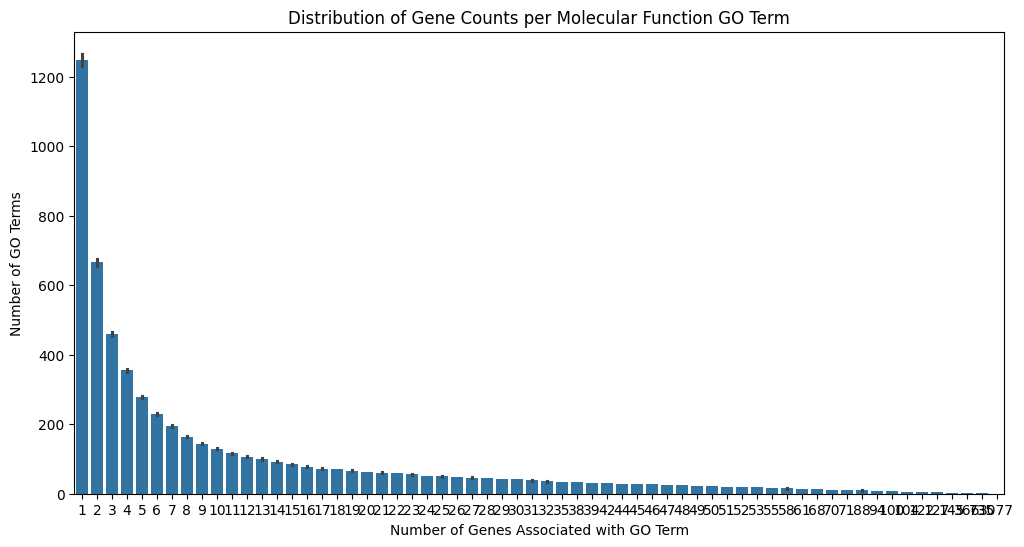

In [ ]:
# visualise the number of genes associated with each GO term         
plt.figure(figsize=(12, 6))
sns.barplot(x=term_gene_counts_df['Gene_Count'].to_list(),
            y=[i for i in range(len(term_gene_counts_df.index))])
plt.title('Distribution of Gene Counts per Molecular Function GO Term')
plt.xlabel('Number of Genes Associated with GO Term')
plt.ylabel('Number of GO Terms')
plt.show()

In [96]:
refined_mfdf.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF,2
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF,2
5,ENSG00000204520,MICA,Molecular_Function,GO:0030881,beta-2-microglobulin binding,IDA,MF,3
6,ENSG00000204520,MICA,Molecular_Function,GO:0046703,natural killer cell lectin-like receptor binding,IDA,MF,4


In [27]:
refined_mfdf[refined_mfdf['Gene_Symbol']=='AAMDC']

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
16159,ENSG00000087884,AAMDC,Molecular_Function,GO:0005515,protein binding,IPI,MF,2


## Filtering using the depth

In [97]:
refined_mfdf[refined_mfdf['depth'] >= 3]

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8
5,ENSG00000204520,MICA,Molecular_Function,GO:0030881,beta-2-microglobulin binding,IDA,MF,3
6,ENSG00000204520,MICA,Molecular_Function,GO:0046703,natural killer cell lectin-like receptor binding,IDA,MF,4
8,ENSG00000204520,MICA,Molecular_Function,GO:0046703,natural killer cell lectin-like receptor binding,IPI,MF,4
9,ENSG00000204520,MICA,Molecular_Function,GO:0048018,receptor ligand activity,IDA,MF,4
...,...,...,...,...,...,...,...,...
27076,ENSG00000169249,ZRSR2,Molecular_Function,GO:0030628,pre-mRNA 3'-splice site binding,IDA,MF,5
27077,ENSG00000169249,ZRSR2,Molecular_Function,GO:0042802,identical protein binding,IPI,MF,3
27086,ENSG00000079999,KEAP1,Molecular_Function,GO:0061629,RNA polymerase II-specific DNA-binding transcr...,IPI,MF,5
27088,ENSG00000079999,KEAP1,Molecular_Function,GO:0140416,transcription regulator inhibitor activity,IDA,MF,3


In [98]:
print("Summary of Gene Ontology Annotated Counts:")
print(f"Total number of unique genes in the original dataset: {mf_df['Gene'].nunique()}")
print(f"Total number of unique genes with high-confidence Molecular Function GO annotations: {refined_mfdf['Gene'].nunique()}")
print(f"Total number of unique genes with high-confidence Molecular Function GO annotations at depth >= 3: {refined_mfdf[refined_mfdf['depth'] >= 3]['Gene'].nunique()}")

Summary of Gene Ontology Annotated Counts:
Total number of unique genes in the original dataset: 3437
Total number of unique genes with high-confidence Molecular Function GO annotations: 3321
Total number of unique genes with high-confidence Molecular Function GO annotations at depth >= 3: 2525


In [ ]:
third_level_mfdf = refined_mfdf[refined_mfdf['depth'] >= 3] 
third_level_unique_genes = third_level_mfdf['Gene'].unique().tolist()
len(third_level_unique_genes)

2525

In [219]:
third_level_mfdf_fixed = refined_mfdf[refined_mfdf['depth'] == 3] 
third_level_unique_genes_fixed = third_level_mfdf_fixed['Gene'].unique().tolist()
len(third_level_unique_genes_fixed)

1519

In [290]:
third_level_mfdf_less = refined_mfdf[refined_mfdf['depth'] <= 3] 
third_level_unique_genes_less = third_level_mfdf_less['Gene'].unique().tolist()
len(third_level_unique_genes_less)

3201

In [289]:
third_level_mfdf_less.Gene.nunique()

117

In [284]:
third_level_mfdf_less.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
43,ENSG00000130203,APOE,Molecular_Function,GO:0005198,structural molecule activity,TAS,MF,1
52,ENSG00000130203,APOE,Molecular_Function,GO:0016209,antioxidant activity,IDA,MF,1
85,ENSG00000106263,EIF3B,Molecular_Function,GO:0060090,molecular adaptor activity,TAS,MF,1
150,ENSG00000031698,SARS1,Molecular_Function,GO:0060090,molecular adaptor activity,IDA,MF,1
337,ENSG00000167552,TUBA1A,Molecular_Function,GO:0005198,structural molecule activity,TAS,MF,1


In [285]:
def length(x):
    x = np.unique(x)
    length = len(x)
    if length ==1:
        return True
    else:
        return False

In [286]:
length_three_ids = third_level_mfdf_less.groupby('Gene')['depth'].apply(list).transform(lambda x:len(np.unique(x)) ==1)
len(length_three_ids)

117

In [287]:
length_three_ids_true = [k for k,i in length_three_ids.items() if i]
length_three_ids_true

['ENSG00000004779',
 'ENSG00000026025',
 'ENSG00000031698',
 'ENSG00000035403',
 'ENSG00000049323',
 'ENSG00000051523',
 'ENSG00000068796',
 'ENSG00000078674',
 'ENSG00000088325',
 'ENSG00000092621',
 'ENSG00000092841',
 'ENSG00000099624',
 'ENSG00000100387',
 'ENSG00000100605',
 'ENSG00000101365',
 'ENSG00000101412',
 'ENSG00000104687',
 'ENSG00000105379',
 'ENSG00000105583',
 'ENSG00000105968',
 'ENSG00000106211',
 'ENSG00000106263',
 'ENSG00000108588',
 'ENSG00000109270',
 'ENSG00000111275',
 'ENSG00000112697',
 'ENSG00000114867',
 'ENSG00000115484',
 'ENSG00000116586',
 'ENSG00000119487',
 'ENSG00000120438',
 'ENSG00000122378',
 'ENSG00000122545',
 'ENSG00000123131',
 'ENSG00000123416',
 'ENSG00000124588',
 'ENSG00000125107',
 'ENSG00000126432',
 'ENSG00000127540',
 'ENSG00000127914',
 'ENSG00000130159',
 'ENSG00000130203',
 'ENSG00000131725',
 'ENSG00000134248',
 'ENSG00000135624',
 'ENSG00000136003',
 'ENSG00000136811',
 'ENSG00000136937',
 'ENSG00000137100',
 'ENSG00000137309',


In [288]:
len(length_three_ids_true), len(np.unique(length_three_ids_true))

(117, 117)

In [267]:
third_level_mfdf_less[third_level_mfdf_less['Gene']=='ENSG00000117410']

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF,2


In [226]:
third_level_mfdf_less[third_level_mfdf_less.groupby('Gene')['depth'].apply(length)]

/tmp/ipykernel_12785/818381261.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  third_level_mfdf_less[third_level_mfdf_less.groupby('Gene')['depth'].apply(length)]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [33]:
union_df = pd.read_csv('../data/union_genes_clustered_df.csv')
union_df.head()

,gene_transcript,ENSG00000188976,ENSG00000187961,ENSG00000187608,ENSG00000160087,ENSG00000127054,ENSG00000162576,ENSG00000175756,ENSG00000242485,ENSG00000160072,...,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727
0,10005_ZBTB4_P1_ENSG00000174282,-0.030201,-0.088615,0.097081,-0.050281,0.053923,0.047092,0.025221,-0.003499,-0.085795,...,0.319526,0.479325,0.232490,0.783892,0.759569,0.293088,0.485888,0.890428,0.252083,0.634143
1,10006_ZBTB5_P1P2_ENSG00000168795,-0.094131,0.093585,0.041780,0.011111,0.049495,0.068986,-0.062200,0.044283,-0.089965,...,0.045284,-0.076742,-0.120616,0.070922,0.016384,-0.156901,-0.037597,0.021802,0.063851,0.220182
2,10015_ZBTB8OS_P1P2_ENSG00000176261,0.042972,-0.122381,0.015089,-0.010220,0.021991,-0.140862,-0.131819,0.023055,-0.064811,...,-0.091865,0.015270,0.023904,-0.119254,-0.024721,-0.149914,-0.079422,0.134310,-0.018046,0.106836
3,10020_ZC3H13_P1P2_ENSG00000123200,-0.120841,-0.013023,0.690666,0.369722,0.229487,0.635588,0.187934,0.145091,-0.204043,...,0.421244,0.118716,1.633748,0.379121,0.741676,0.302818,0.341236,-0.045770,0.586778,0.497639
4,10022_ZC3H15_P1P2_ENSG00000065548,-0.069962,0.045348,-0.056278,0.054014,0.087813,-0.018570,-0.081548,0.034590,-0.071243,...,-0.056516,-0.100137,-0.184080,-0.184826,-0.338238,-0.107827,-0.124266,-0.230523,-0.098643,-0.313071


In [35]:
perturbations = union_df['gene_transcript'].tolist()
perturbations  = [i.split("_")[-1] for i in perturbations]
print(f'The number of perturbed genes is {len(perturbations)}, and unique ones are {len(set(perturbations))}')
gene = union_df.columns[1:].tolist()
print(f'The number of genes are {len(gene)}, and unique ones are {len(set(gene))}')
union = set(gene) | set(perturbations)
print(f'The number of union genes is {len(union)}')
union = list(union)

The number of perturbed genes is 3630, and unique ones are 3483
The number of genes are 3460, and unique ones are 3460
The number of union genes is 3604


In [36]:
# genes in the union that have high-confidence Molecular Function GO annotations at depth >= 3
third_level_genes_in_union = set(third_level_unique_genes).intersection(set(union))
print(f"The number of genes in the union with high-confidence Molecular Function GO annotations at depth >= 3 is {len(third_level_genes_in_union)}")

The number of genes in the union with high-confidence Molecular Function GO annotations at depth >= 3 is 2525


In [101]:
# Number of Strong Perturbation retained in dataframe with depth >= 3 GO annotations
SPG_df = pd.read_csv('../data/strong_perturbations_1973.csv')
HVG_df = pd.read_csv('../data/highly_responsive_gene_2319.csv')

In [104]:
retained_SPG = set(SPG_df.gene_code.tolist()).intersection(third_level_unique_genes)
print(f"The number of Strong Perturbation Genes retained after filtering for depth >= 3 GO annotations is {len(retained_SPG)} out of {SPG_df.gene_code.nunique()}")

The number of Strong Perturbation Genes retained after filtering for depth >= 3 GO annotations is 1421 out of 1965


In [ ]:
print(f'The number of unique genes in SPG dataframe is {SPG_df.gene_code.nunique()}')
print(f"The shape of SPG dataframe is {SPG_df.shape[0]}")

The number of unique genes in SPG dataframe is 1965
The shape of SPG dataframe is 1973


In [121]:
SPG_df.shape


(1973, 5)

In [108]:
import anndata as ad

In [109]:
# reading the .h5ad file from the data directory
file_path = '../data/K562_gwps_normalized_bulk_01.h5ad'

adata = ad.read_h5ad(file_path)

print(adata)

AnnData object with n_obs × n_vars = 11258 × 8248
    obs: 'UMI_count_unfiltered', 'num_cells_unfiltered', 'num_cells_filtered', 'control_expr', 'fold_expr', 'pct_expr', 'core_control', 'mean_leverage_score', 'std_leverage_score', 'energy_test_p_value', 'anderson_darling_counts', 'mann_whitney_counts', 'z_gemgroup_UMI', 'mitopercent', 'TE_ratio', 'cnv_score_z'
    var: 'gene_name', 'mean', 'std', 'cv', 'in_matrix', 'gini', 'clean_mean', 'clean_std', 'clean_cv'


In [107]:
HVG_df.head()


,gene_name,cluster
0,CYP51A1,4
1,BAD,-1
2,CD99,-1
3,MAD1L1,29
4,CFLAR,19


In [115]:
HVG_df.shape[0]

2319

In [113]:
gene_id_to_name = adata.var.gene_name.to_dict()

In [114]:
gene_name_to_id = {v: k for k, v in gene_id_to_name.items()}

In [117]:
HVG_gene_id = [gene_name_to_id.get(name) for name in HVG_df.gene_name.tolist() if name in gene_name_to_id]
len(HVG_gene_id)

2319

In [119]:
HVG_df['gene_id'] = HVG_gene_id
HVG_df.head()

,gene_name,cluster,gene_id
0,CYP51A1,4,ENSG00000001630
1,BAD,-1,ENSG00000002330
2,CD99,-1,ENSG00000002586
3,MAD1L1,29,ENSG00000002822
4,CFLAR,19,ENSG00000003402


In [123]:
HVG_df.shape

(2319, 3)

In [124]:
HVG_df.gene_id.nunique()

2319

In [120]:
retained_HVG = set(HVG_df.gene_id.tolist()).intersection(third_level_unique_genes)
print(f"The number of Highly Variable Genes retained after filtering for depth >= 3 GO annotations is {len(retained_HVG)} out of {HVG_df.gene_id.nunique()}")

The number of Highly Variable Genes retained after filtering for depth >= 3 GO annotations is 1632 out of 2319


In [ ]:
# HVG_df.to_csv('../data/highly_responsive_genes_2319_with_gene_id.csv', index=False)

# Molecular Function Insight (Third Level Depth)

In [ ]:
#third_level_mfdf.to_csv('../data/ontology/molecular_function_depth3_most_trusted.csv', index=False)

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
third_level_mfdf.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8
5,ENSG00000204520,MICA,Molecular_Function,GO:0030881,beta-2-microglobulin binding,IDA,MF,3
6,ENSG00000204520,MICA,Molecular_Function,GO:0046703,natural killer cell lectin-like receptor binding,IDA,MF,4
8,ENSG00000204520,MICA,Molecular_Function,GO:0046703,natural killer cell lectin-like receptor binding,IPI,MF,4
9,ENSG00000204520,MICA,Molecular_Function,GO:0048018,receptor ligand activity,IDA,MF,4


In [160]:
third_level_mfdf.shape[0]

8599

In [191]:
third_level_mfdf.iloc[0]['Term']

'proton-transporting ATPase activity, rotational mechanism'

In [192]:
third_level_mfdf[third_level_mfdf['Term'].isin(['proton-transporting ATPase activity, rotational mechanism'])]

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category,depth
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8
934,ENSG00000147416,ATP6V1B2,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8
6695,ENSG00000185883,ATP6V0C,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8
9258,ENSG00000110955,ATP5F1B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IMP,MF,8
11279,ENSG00000155097,ATP6V1C1,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8
17290,ENSG00000113732,ATP6V0E1,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IGI,MF,8
17291,ENSG00000113732,ATP6V0E1,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF,8


In [195]:
third_level_mfdf.Gene_Symbol.nunique()

2525

In [194]:
UNIQUE_MF = third_level_mfdf['Term'].unique().tolist()
print(f'The number of unique Molecular Function GO terms at depth >= 3 is {len(UNIQUE_MF)}')

The number of unique Molecular Function GO terms at depth >= 3 is 1613


In [196]:
# Mapping molecular function GO terms to genes
term_to_genes_depth3 = third_level_mfdf.groupby('Term')['Gene_Symbol'].unique().to_dict()
print(f'The number of unique Molecular Function GO terms at depth >= 3 is {len(term_to_genes_depth3)}')

The number of unique Molecular Function GO terms at depth >= 3 is 1613


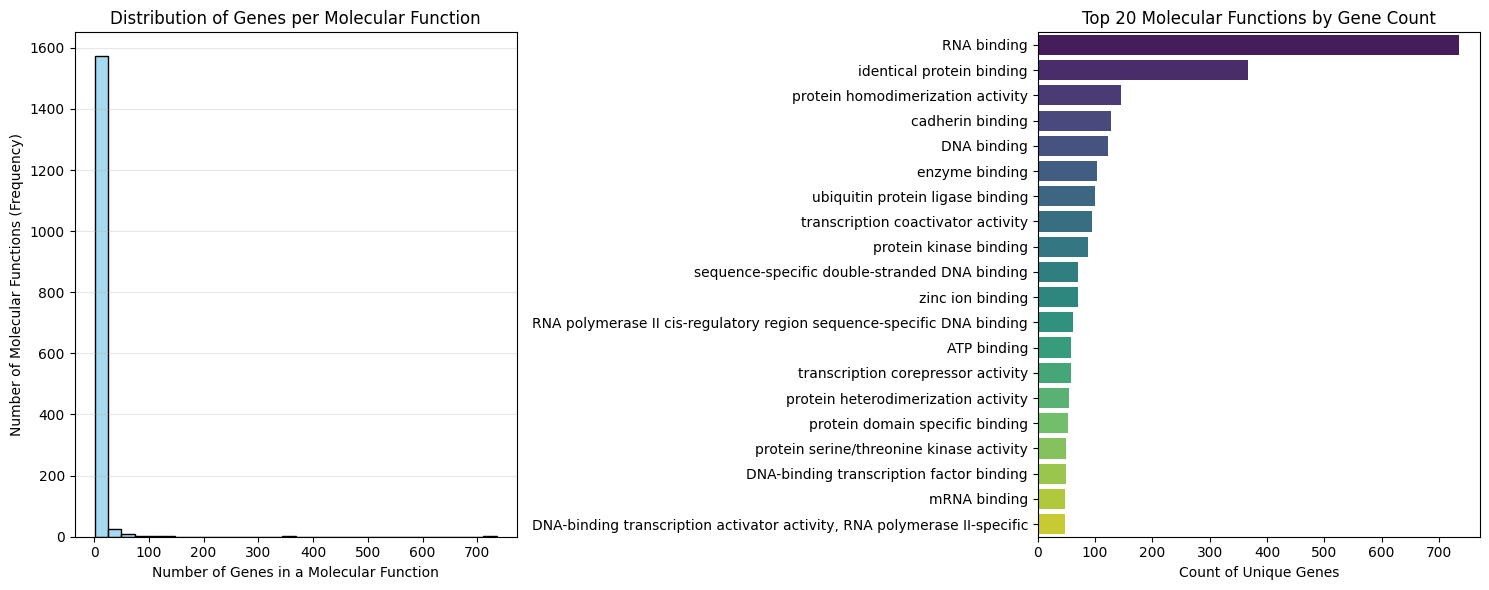

In [214]:
genes_per_term = third_level_mfdf.groupby('Term')['Gene_Symbol'].nunique().sort_values(ascending=False)

# 2. Create the Plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Plot A: The Histogram (Distribution) ---
# This tells you: "How many terms have X number of genes?"
sns.histplot(genes_per_term, bins=30, kde=False, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Genes per Molecular Function')
axes[0].set_xlabel('Number of Genes in a Molecular Function')
axes[0].set_ylabel('Number of Molecular Functions (Frequency)')
axes[0].grid(axis='y', alpha=0.3)

# --- Plot B: The Top 20 Terms (Bar Chart) ---
# This tells you: "What are the largest terms?"
top_n = 20
top_terms = genes_per_term.head(top_n)
sns.barplot(x=top_terms.values, y=top_terms.index, ax=axes[1], hue=top_terms.index, palette='viridis', legend=False)
axes[1].set_title(f'Top {top_n} Molecular Functions by Gene Count')
axes[1].set_xlabel('Count of Unique Genes')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

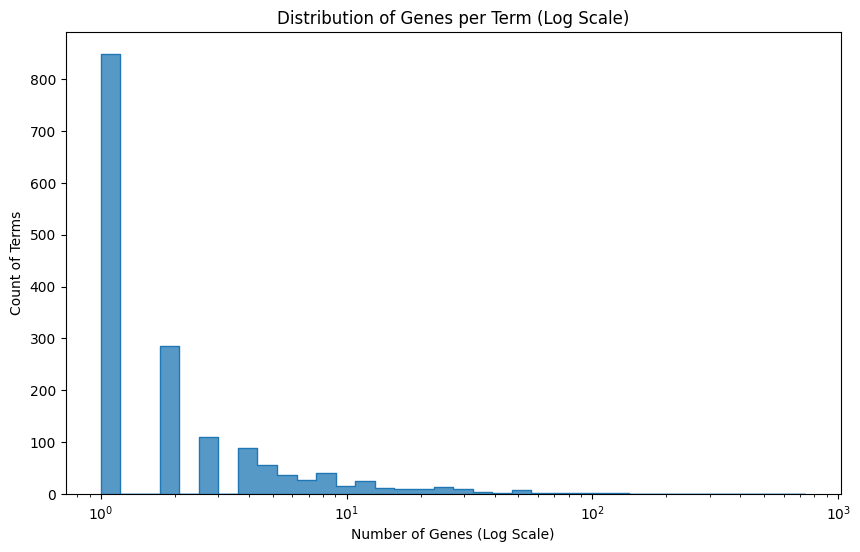

In [199]:
fig, ax = plt.subplots(figsize=(10, 6))

# Use log_scale=True (for the data axis)
# element="step" draws an outline which is often cleaner for log plots
sns.histplot(genes_per_term, log_scale=True, element="step", ax=ax)

ax.set_title('Distribution of Genes per Term (Log Scale)')
ax.set_xlabel('Number of Genes (Log Scale)')
ax.set_ylabel('Count of Terms')

plt.show()

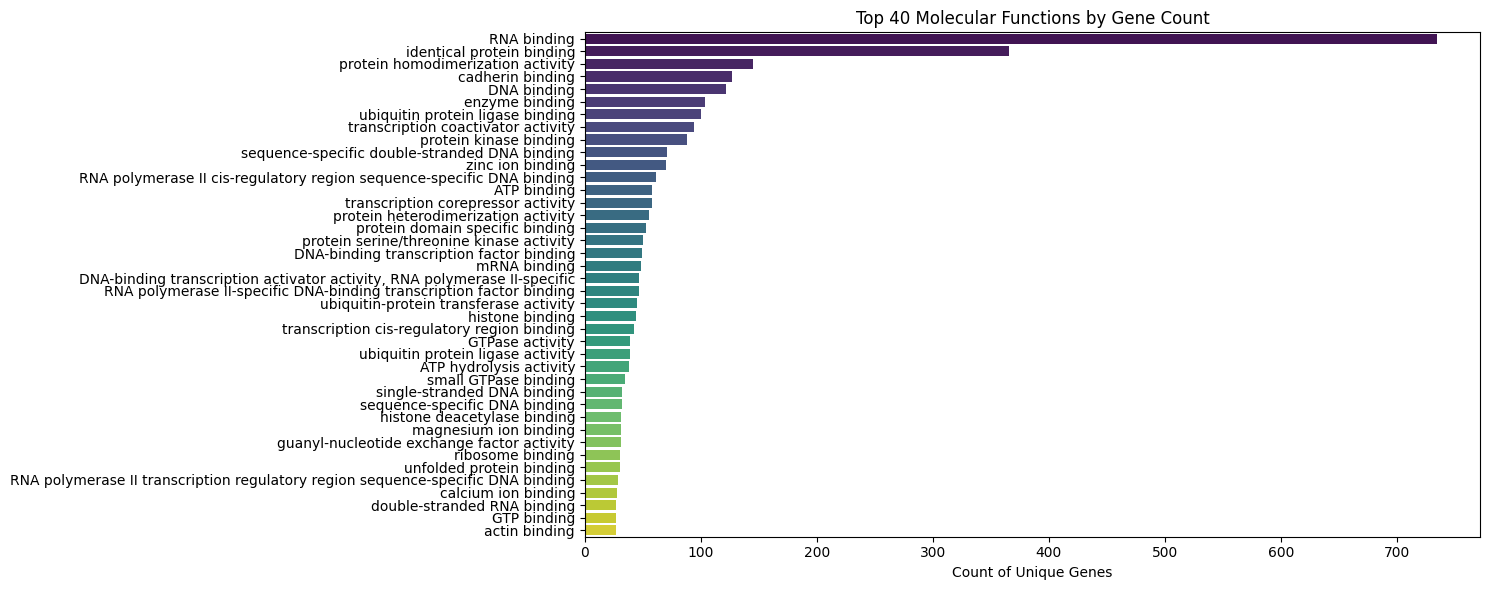

In [210]:
top_n = 40
top_terms = genes_per_term.head(top_n)
fig, axes = plt.subplots(1, 1, figsize=(15, 6))

sns.barplot(x=top_terms.values, y=top_terms.index, ax=axes, hue=top_terms.index, palette='viridis', legend=False)
axes.set_title(f'Top {top_n} Molecular Functions by Gene Count')
axes.set_xlabel('Count of Unique Genes')
axes.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
third_level_mfdf.groupby('Term')['Gene_Symbol'].nunique().max(),  third_level_mfdf.groupby('Term')['Gene_Symbol'].nunique().min()

(735, 1)

# Causal Link Connection

In [216]:
causal_df = pd.read_csv('../data/cluster_causal_link.csv')
causal_df.head()

,cause,effect
0,1946_CTSC_P1P2_ENSG00000109861,ENSG00000109861
1,2209_DHX33_P1P2_ENSG00000005100,"ENSG00000187608,ENSG00000160087,ENSG0000011625..."
2,956_HIKESHI_P1P2_ENSG00000149196,"ENSG00000168653,ENSG00000117450,ENSG0000016346..."
3,7780_SELENOP_P1P2_ENSG00000250722,"ENSG00000164327,ENSG00000250722"
4,9601_UPF2_P1P2_ENSG00000151461,"ENSG00000160087,ENSG00000197785,ENSG0000011628..."
